<a href="https://colab.research.google.com/github/TomAmster/Data-Science/blob/master/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split,cross_validate,StratifiedShuffleSplit
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score,classification_report, average_precision_score
from sklearn.calibration import CalibratedClassifierCV
import xgboost
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold

In [0]:
train = pd.read_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/X_Train5.csv')
test = pd.read_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/X_test5.csv')


In [0]:
import sklearn.metrics
 
def plotRoc(fpr, tpr, auc):
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
    
def plotPR(precision, recall):
  plt.figure()
  plt.plot(recall, precision, label='PR curve')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall curve')
  plt.legend(loc='lower left')
  plt.show()
 
def plotMetrics(expected,predicted):
  y_true = expected
  y_score = predicted
  #y_score = df['rawPrediction'].map(lambda x: x['values'][1])
  auc = sklearn.metrics.roc_auc_score(y_true, y_score)
  fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_score)
  plotRoc(fpr, tpr, auc)
  precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_score, pos_label=1)
  plotPR(precision, recall)

# All Features Models



In [0]:
test_col = test.columns
train_col = train.columns
print(test.shape)
print(train.shape)
missing1 = [ i for i in train_col if i not in test_col]
missing2 = [ i for i in test_col if i not in train_col]

print(missing1)
print(missing2)

(4700, 270)
(2013, 275)
['Unnamed: 0.1', 'gp', 'mh', 'tc', 'address', 'payment_account']
['vc']


In [0]:
train=train.drop('Unnamed: 0.1',1)
train=train.drop('gp',1)
train=train.drop('mh',1)
train=train.drop('tc',1)
train=train.drop('address',1)
train=train.drop('payment_account',1)
test = test.drop('vc',1)


In [0]:
train=train.drop('Unnamed: 0',1)
test = test.drop('Unnamed: 0',1)
train=train.drop('Unnamed: 0_x',1)
test = test.drop('Unnamed: 0_x',1)
test=test.drop('outcome',1)
train=train.drop('most_common_country',1)
test = test.drop('most_common_country',1)	

In [0]:
test_col = test.columns
train_col = train.columns
print(test.shape)
print(train.shape)
missing1 = [ i for i in train_col if i not in test_col]
missing2 = [ i for i in test_col if i not in train_col]

print(missing1)
print(missing2)

(4700, 265)
(2013, 266)
['outcome']
[]


In [0]:
train.head()


,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean,countries_per_bidder_per_auction_median,countries_per_bidder_per_auction_mean,countries_per_bidder_per_auction_max,ad,ae,af,ag,al,am,an,ao,ar,...,wins,last_10%_auction_time_bids,first_10%_auction_time_bids,first_10%_bids_fraction,avg_min_time_diff,avg_max_time_diff,global_min_time_diff,global_max_time_diff,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,First_10%_time_bids_count_of_won_auctions,Last_90%_time_bids_count_of_won_auctions,Bids_count_of_won_auctions,First_10%_price_bids_count_of_won_auctions,Last_90%_price_bids_count_of_won_auctions,Unnamed: 0_y,max_bid_count_in_10_minutes,max_bid_count_in_30_minutes,max_bid_count_in_60_minutes,max_consec_no_param_change,mean_consec_no_param_change,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
0,5354c02817e47f28e60e44a40ca5e48dll4sz,1.0,False,0,1,0,1,181,18,1,51,7,13,1,10.055556,3.549020,181.000000,25.857143,5.656250,0.464497,1,0.153846,1,0.980392,1,1.0,1,1.000000,1.0,1.555556,3.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,3.0,122.0,0.674033,9.609907e+10,5.410220e+12,52631579.0,8.512737e+12,122.0,43.0,6.0,5.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,670,10.0,22.0,25.0,1.0,1.000000,4723.0,1517.0,4635.0,12.0,1.0,12.0,38.121547,39.779006,0.000000,22.099448
1,9434778d2268f1fa2a8ede48c0cd05c097zey,1.0,False,0,1,0,1,6540,269,1,408,65,3455,1916,24.312268,16.029412,3.413361,100.615385,1.733369,0.284229,1,0.182923,1,0.980392,1,1.0,1,0.001044,1.0,1.342007,32.0,0.0,0.00142,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,946.0,2288.0,0.349847,3.704471e+12,1.493421e+13,0.0,5.002937e+13,2288.0,1835.0,29.0,31.0,59.0,13.0,14.0,30.0,1295.0,946.0,0.0,0.0,0.0,0.0,0.0,0.0,1181,30.0,71.0,132.0,5.0,1.191011,333.0,141.0,138.0,0.0,0.0,0.0,28.654434,34.954128,14.006116,22.385321
2,aabc211b4cf4d29e4ac7e7e361371622pockb,1.0,True,0,0,0,0,2048,127,1,24,14,358,5,16.125984,85.333333,409.600000,146.285714,1.889299,0.116098,1,0.410615,1,1.000000,1,1.0,1,0.200000,1.0,1.000000,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.394203,...,3,585.0,445.0,0.217285,4.480191e+12,2.239328e+13,0.0,5.010521e+13,445.0,209.0,93.0,99.0,63.0,79.0,133.0,69.0,273.0,582.0,3.0,112.0,72.0,562.0,74.0,27.0,1359,18.0,39.0,72.0,2.0,1.072727,936.0,574.0,451.0,0.0,0.0,0.0,22.998047,35.839844,26.513672,14.648438
3,68d468e15e0de0bab9694cdca8e799eb2j8kn,1.0,False,0,1,0,0,281,26,1,1,2,8,7,10.807692,281.000000,40.142857,140.500000,4.532258,0.185507,1,0.125000,1,1.000000,1,1.0,0,0.000000,1.0,1.000000,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1,11.0,0.0,0.000000,2.977117e+09,7.429130e+11,0.0,3.268789e+12,0.0,0.0,0.0,0.0,0.0,144.0,17.0,0.0,109.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,832,61.0,131.0,161.0,160.0,65.195349,2270.0,561.0,1012.0,1.0,0.0,0.0,57.295374,0.000000,0.000000,42.704626
4,1cbd9081de4481ada66f1853737f7684ddjd1,1.0,True,0,0,0,0,1103,107,1,4,29,836,4,10.308411,275.750000,275.750000,38.034483,1.150156,0.403784,1,0.161483,1,1.000000,1,1.0,1,0.250000,1.0,1.065421,3.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,6,210.0,194.0,0.175884,9.123455e+11,3.391712e+12,0.0,1.931579e+11,194.0,122.0,71.0,49.0,83.0,125.0,96.0,88.0,65.0,204.0,6.0,16.0,10.0,105.0,21.0,7.0,222,13.0,28.0,47.0,1.0,1.000000,347.0,765.0,237.0,0.0,0.0,0.0,12.783318,37

In [0]:
test.head()

,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean,countries_per_bidder_per_auction_median,countries_per_bidder_per_auction_mean,countries_per_bidder_per_auction_max,ad,ae,af,ag,al,am,an,ao,ar,at,...,wins,last_10%_auction_time_bids,first_10%_auction_time_bids,first_10%_bids_fraction,avg_min_time_diff,avg_max_time_diff,global_min_time_diff,global_max_time_diff,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,First_10%_time_bids_count_of_won_auctions,Last_90%_time_bids_count_of_won_auctions,Bids_count_of_won_auctions,First_10%_price_bids_count_of_won_auctions,Last_90%_price_bids_count_of_won_auctions,Unnamed: 0_y,max_bid_count_in_10_minutes,max_bid_count_in_30_minutes,max_bid_count_in_60_minutes,max_consec_no_param_change,mean_consec_no_param_change,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,3,4,3,1.333333,2.000000,1.333333,1.333333,1.000000,0.000000,1,0.500000,1,1.000000,1,1.0,1,0.333333,1.0,1.333333,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,1.0,2.0,0.500000,4.545421e+12,4.545421e+12,4.545421e+12,5.989721e+13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1344,1.0,1.0,1.0,0.0,0.000000,70350.0,23440.0,70350.0,86363.0,23440.0,86363.0,50.000000,0.000000,25.000000,25.000000
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,2,2,1,1.500000,1.000000,3.000000,1.500000,1.500000,0.500000,0,0.000000,1,1.000000,1,1.0,1,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,1.0,2.0,0.666667,1.052632e+08,1.052632e+08,1.052632e+08,7.600195e+13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3104,2.0,2.0,2.0,0.0,0.000000,61639.0,74019.0,61639.0,61639.0,2.0,61639.0,33.333333,66.666667,0.000000,0.000000
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,3,4,2,1.214286,4.250000,8.500000,5.666667,1.133333,0.150000,1,0.250000,1,1.000000,1,1.0,0,0.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,5.0,2.0,0.117647,9.542105e+10,9.542105e+10,2.631579e+08,2.485789e+11,2.0,0.0,0.0,3.0,0.0,2.0,4.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,13.0,16.0,16.0,3.0,1.555556,1843.0,921.0,1843.0,261.0,20.0,261.0,0.000000,100.000000,0.000000,0.000000
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,14,129,80,1.644444,1.827160,1.850000,10.571429,1.072464,0.225131,1,0.310078,1,1.000000,1,1.0,1,0.012500,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,30.0,43.0,0.290541,1.363488e+13,1.750337e+13,2.105263e+08,5.015947e+13,43.0,22.0,4.0,8.0,2.0,5.0,6.0,9.0,19.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,4321,4.0,6.0,7.0,1.0,1.000000,8753.0,6336.0,6108.0,33.0,4.0,4.0,18.918919,43.918919,17.567568,19.594595
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,2,17,1,1.150000,1.352941,23.000000,11.500000,1.000000,0.378378,1,0.176471,1,0.941176,1,1.0,1,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,...,0,1.0,10.0,0.434783,2.162930e+12,2.162930e+12,6.421053e+09,3.373105e+12,10.0,6.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3799,5.0,8.0,13.0,0.0,0.000000,29907.0,5678.0,5678.0,26120.0,122.0,122.0,13.043478,0.000000,82.608696,4.347826


In [0]:
train=train.sample(frac=1)


In [0]:
X_train = train.drop('outcome',1)
X_train = X_train.drop('bidder_id',1)
y_train= train['outcome']

In [0]:
y_submission = test['bidder_id']
X_test = test.drop('bidder_id',1)

In [0]:
X_train_CV, X_test_CV, y_train_CV, y_test_CV = train_test_split(X_train, y_train, random_state=30)

# Setting Up Models

In [0]:
##SVM
svm_linear_model = LinearSVC()
SVM_classifier = CalibratedClassifierCV(svm_linear_model) 

##Random Forest
RF_model=RandomForestClassifier(random_state=42)
RF_param_grid = { 
    'n_estimators': [100,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7]      
}
##Gradient boost
GB_Model = GradientBoostingClassifier(random_state=42)
GB_param_grid = {
    'n_estimators': [10,25,50],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 11)
}

##XGBoost
XGB_Model = xgboost.XGBClassifier()
XGB_param_grid = {
                  'max_depth': np.arange(2,50,2),
                  'learning_rate': np.arange(0.2,2,0.2),
                  'n_estimators': np.arange(20,400,20),
                  'reg_alpha': np.arange(0,2,0.2),
                  'reg_lambda': np.arange(0,2,0.2)
                 }

# Hypertuning Parameters

## Random Forest

In [0]:
RF_classifier = GridSearchCV(estimator=RF_model, param_grid=RF_param_grid, cv= 5,verbose=3)
RF_classifier.fit(X_train_CV, y_train_CV)
print(RF_classifier.best_params_)

## Gradient Boost

In [0]:
GB_classifier = GridSearchCV(estimator=GB_Model,
                     param_grid=GB_param_grid,
                     cv=5, verbose=3)
GB_classifier.fit(X_train_CV, y_train_CV)
print(GB_classifier.best_params_)

{'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 50}


## XGBoost

In [0]:
CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)
XGB_classifier = RandomizedSearchCV(XGB_Model, XGB_param_grid, scoring = 'roc_auc', cv = CV_SSS,
                                        n_iter = 40,verbose=3)
XGB_classifier.fit(X_train_CV,y_train_CV)
print(XGB_classifier.best_params_)

# Fitting Model 

In [0]:
##SVM
SVM_classifier.fit(X_train_CV,y_train_CV) 

##Random Forest
RF_bestClf = RF_classifier.best_estimator_
RF_bestClf.fit(X_train_CV, y_train_CV)

##Gradient Boost
GB_bestClf = GB_classifier.best_estimator_
GB_bestClf.fit(X_train_CV, y_train_CV)

##XGBoost
XGB_bestClf = XGB_classifier.best_estimator_
XGB_bestClf.fit(X_train_CV, y_train_CV)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=48,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.8, reg_lambda=0.4, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Train Metrics

## Classification Report

In [0]:
expected_train=y_train_CV
##Predicted Results On Train
SVM_predicted_train = SVM_classifier.predict(X_train_CV)
RF_predicted_train = RF_bestClf.predict(X_train_CV)
GB_predicted_train = GB_classifier.predict(X_train_CV)
XGB_predicted_train = XGB_classifier.predict(X_train_CV)

print("SVM CLASSIFICATION REPORT")
print(classification_report(expected_train, SVM_predicted_train))
print("-----------------------------")

print("RANDOM FOREST CLASSIFICATION REPORT")
print(classification_report(expected_train, RF_predicted_train))
print("-----------------------------")

print("GRADIENT BOOST CLASSIFICATION REPORT")
print(classification_report(expected_train, GB_predicted_train))
print("-----------------------------")

print("XGBOOST CLASSIFICATION REPORT")
print(classification_report(expected_train, XGB_predicted_train))


SVM CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1427
         1.0       0.00      0.00      0.00        82

    accuracy                           0.95      1509
   macro avg       0.47      0.50      0.49      1509
weighted avg       0.89      0.95      0.92      1509

-----------------------------
RANDOM FOREST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1427
         1.0       1.00      0.78      0.88        82

    accuracy                           0.99      1509
   macro avg       0.99      0.89      0.94      1509
weighted avg       0.99      0.99      0.99      1509

-----------------------------
GRADIENT BOOST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1427
         1.0       1.00      0.88      0.94        82

    accuracy           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Average Precision

In [0]:
SVM_predicted_probs_train = SVM_classifier.predict_proba(X_train_CV)
RF_predicted_probs_train= RF_bestClf.predict_proba(X_train_CV)
GB_predicted_probs_train= GB_bestClf.predict_proba(X_train_CV)
XGB_predicted_probs_train = XGB_bestClf.predict_proba(X_train_CV)

print("AVERAGE PRECISION SVM")
print(average_precision_score(y_train_CV.astype('int'),SVM_predicted_probs_train[:,1]))

print("AVERAGE PRECISION RANDOM FOREST")
print(average_precision_score(y_train_CV.astype('int'),RF_predicted_probs_train[:,1]))

print("AVERAGE PRECISION GRADIENT BOOST")
print(average_precision_score(y_train_CV.astype('int'),GB_predicted_probs_train[:,1]))

print("AVERAGE PRECISION XGBOOST")
print(average_precision_score(y_train_CV.astype('int'),XGB_predicted_probs_train[:,1]))


AVERAGE PRECISION SVM
0.14862315706826226
AVERAGE PRECISION RANDOM FOREST
0.9950753835703732
AVERAGE PRECISION GRADIENT BOOST
0.9904835968559722
AVERAGE PRECISION XGBOOST
1.0


## AUC Graphes

SVM


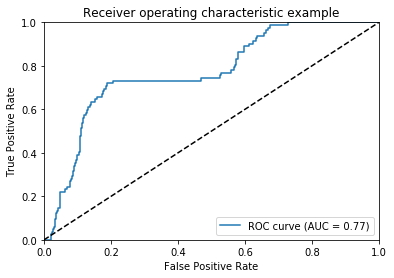

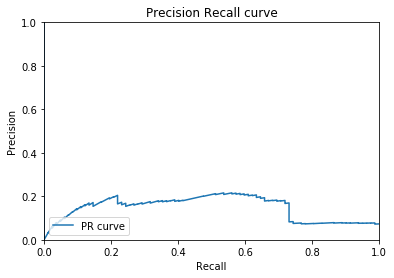

RANDOM FOREST


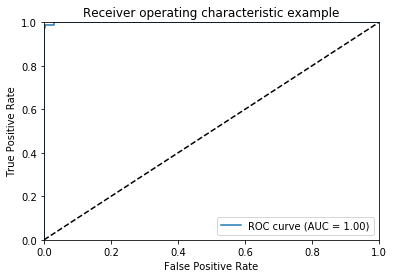

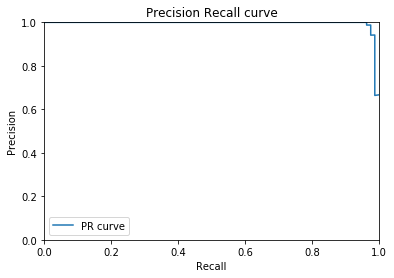

GRADIENT BOOST


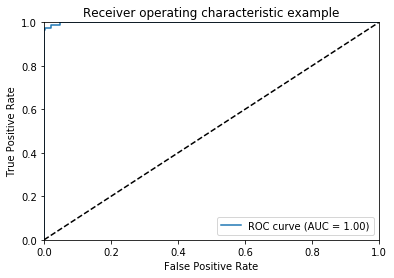

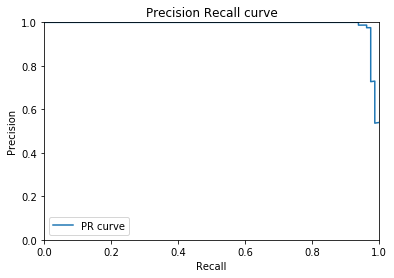

XGBOOST


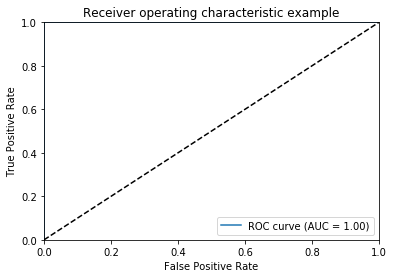

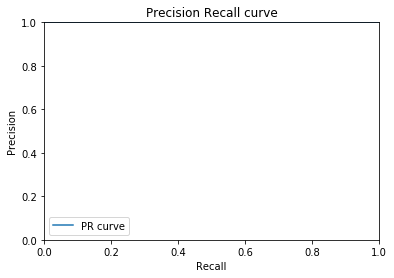

In [0]:
print("SVM")
plotMetrics(expected_train.astype('int'),SVM_predicted_probs_train[:,1])
print("RANDOM FOREST")
plotMetrics(expected_train.astype('int'),RF_predicted_probs_train[:,1])
print("GRADIENT BOOST")
plotMetrics(expected_train.astype('int'),GB_predicted_probs_train[:,1])
print("XGBOOST")
plotMetrics(expected_train.astype('int'),XGB_predicted_probs_train[:,1])


# Test Metrics

## Classification Report

In [0]:
expected_test=y_test_CV
##Predicted Results On Train
SVM_predicted_test = SVM_classifier.predict(X_test_CV)
RF_predicted_test = RF_bestClf.predict(X_test_CV)
GB_predicted_test = GB_bestClf.predict(X_test_CV)
XGB_predicted_test = XGB_bestClf.predict(X_test_CV)

print("SVM CLASSIFICATION REPORT")
print(classification_report(expected_test, SVM_predicted_test))
print("-----------------------------")

print("RANDOM FOREST CLASSIFICATION REPORT")
print(classification_report(expected_test, RF_predicted_test))
print("-----------------------------")

print("GRADIENT BOOST CLASSIFICATION REPORT")
print(classification_report(expected_test, GB_predicted_test))
print("-----------------------------")

print("XGBOOST CLASSIFICATION REPORT")
print(classification_report(expected_test, XGB_predicted_test))


SVM CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       483
         1.0       0.00      0.00      0.00        21

    accuracy                           0.96       504
   macro avg       0.48      0.50      0.49       504
weighted avg       0.92      0.96      0.94       504

-----------------------------
RANDOM FOREST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       483
         1.0       0.67      0.19      0.30        21

    accuracy                           0.96       504
   macro avg       0.82      0.59      0.64       504
weighted avg       0.95      0.96      0.95       504

-----------------------------
GRADIENT BOOST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       483
         1.0       0.57      0.19      0.29        21

    accuracy           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Average Precision

In [0]:
SVM_predicted_probs_test = SVM_classifier.predict_proba(X_test_CV)
RF_predicted_probs_test= RF_bestClf.predict_proba(X_test_CV)
GB_predicted_probs_test= GB_bestClf.predict_proba(X_test_CV)
XGB_predicted_probs_test = XGB_bestClf.predict_proba(X_test_CV)

print("AVERAGE PRECISION SVM")
print(average_precision_score(y_test_CV.astype('int'),SVM_predicted_probs_test[:,1]))

print("AVERAGE PRECISION RANDOM FOREST")
print(average_precision_score(y_test_CV.astype('int'),RF_predicted_probs_test[:,1]))

print("AVERAGE PRECISION GRADIENT BOOST")
print(average_precision_score(y_test_CV.astype('int'),GB_predicted_probs_test[:,1]))

print("AVERAGE PRECISION XGBOOST")
print(average_precision_score(y_test_CV.astype('int'),XGB_predicted_probs_test[:,1]))


AVERAGE PRECISION SVM
0.13066428338824165
AVERAGE PRECISION RANDOM FOREST
0.4971321502432959
AVERAGE PRECISION GRADIENT BOOST
0.4189712772603102
AVERAGE PRECISION XGBOOST
0.5109900019754832


## AUC Graph

SVM


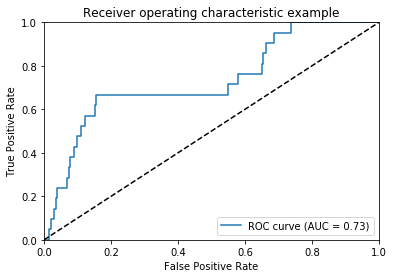

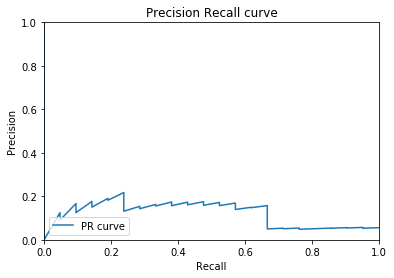

RANDOM FOREST


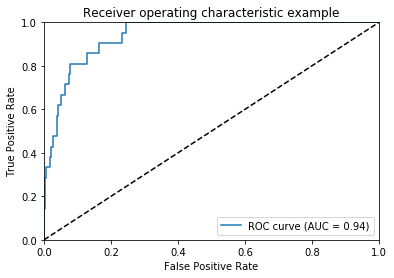

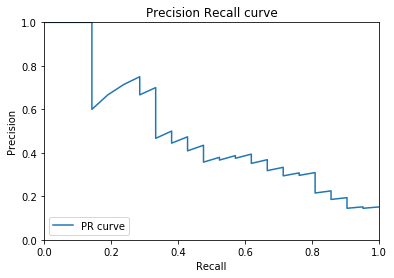

GRADIENT BOOST


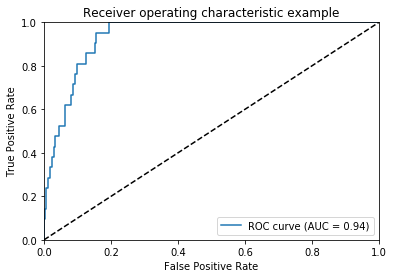

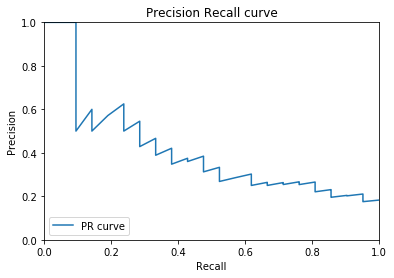

XGBOOST


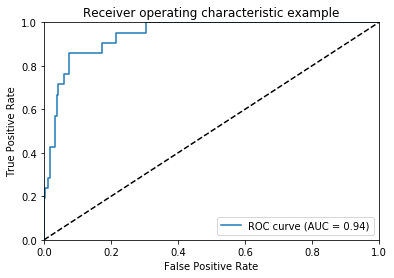

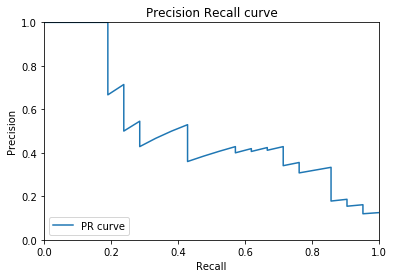

In [0]:
print("SVM")
plotMetrics(y_test_CV.astype('int'),SVM_predicted_probs_test[:,1])
print("RANDOM FOREST")
plotMetrics(y_test_CV.astype('int'),RF_predicted_probs_test[:,1])
print("GRADIENT BOOST")
plotMetrics(y_test_CV.astype('int'),GB_predicted_probs_test[:,1])
print("XGBOOST")
plotMetrics(y_test_CV.astype('int'),XGB_predicted_probs_test[:,1])


# Cross Validation

In [0]:
scoring = ['average_precision', 'roc_auc']
SVM_scores = cross_validate(SVM_classifier, X_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
RF_scores = cross_validate(RF_bestClf, X_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
GB_scores = cross_validate(GB_bestClf, X_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
XGB_score = cross_validate(XGB_bestClf, X_test_CV, y_test_CV, scoring=scoring,return_train_score=True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [0]:
print("SVM CROSS VALIDATION")
print("-------------------------------")
print("average_precision", SVM_scores['test_average_precision'].mean())
print("ROC_AUC", SVM_scores['test_roc_auc'].mean())
print("-------------------------------")

print("RANDOM FOREST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", RF_scores['test_average_precision'].mean())
print("ROC_AUC", RF_scores['test_roc_auc'].mean())
print("-------------------------------")

print("GRADIENT BOOST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", GB_scores['test_average_precision'].mean())
print("ROC_AUC", GB_scores['test_roc_auc'].mean())
print("-------------------------------")

print("XGBOOST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", XGB_score['test_average_precision'].mean())
print("ROC_AUC", XGB_score['test_roc_auc'].mean())
print("-------------------------------")

SVM CROSS VALIDATION
-------------------------------
average_precision 0.20333018920961088
ROC_AUC 0.727405498281787
-------------------------------
RANDOM FOREST CROSS VALIDATION
-------------------------------
average_precision 0.46198650592613444
ROC_AUC 0.9240431701030927
-------------------------------
GRADIENT BOOST CROSS VALIDATION
-------------------------------
average_precision 0.3911985221417199
ROC_AUC 0.8449516752577318
-------------------------------
XGBOOST CROSS VALIDATION
-------------------------------
average_precision 0.4656603283571247
ROC_AUC 0.8600783934707904
-------------------------------


# Submissions

## Train On All Dataset

In [0]:
SVM_classifier.fit(X_train,y_train)

RF_bestClf.fit(X_train,y_train)

GB_bestClf.fit(X_train,y_train)

XGB_bestClf.fit(X_train,y_train)

bestClf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=10,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Create Submission

In [0]:
## Predict Test Results
SVM_test_pred= SVM_classifier.predict_proba(X_test)
RF_test_pred= RF_bestClf.predict_proba(X_test)
GB_test_pred= GB_bestClf.predict_proba(X_test)
XGB_test_pred= XGB_bestClf.predict_proba(X_test)

## Create Series
SVM_test_pred_series = pd.Series(SVM_test_pred[:,1])
RF_test_pred_series = pd.Series(RF_test_pred[:,1])
GB_test_pred_series = pd.Series(GB_test_pred[:,1])
XGB_test_pred_series = pd.Series(XGB_test_pred[:,1])

## Add Prediction Columns
test['SVM_prediction']=SVM_test_pred_series
test['RF_prediction']=RF_test_pred_series
test['GB_prediction']=GB_test_pred_series
test['XGB_prediction']=XGB_test_pred_series



In [0]:
SVM_submission = test[['bidder_id','SVM_prediction']]
SVM_submission = SVM_submission.set_index('bidder_id')

RF_submission=test[['bidder_id','RF_prediction']]
RF_submission= RF_submission.set_index('bidder_id')

GB_submission =test[['bidder_id','GB_prediction']]
GB_submission= GB_submission.set_index('bidder_id')

XGB_submission = test[['bidder_id','XGB_prediction']]
XGB_submission=XGB_submission.set_index('bidder_id')

In [0]:
SVM_submission.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/report_models_SVM.csv')
RF_submission.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/report_models_RF.csv')
GB_submission.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/report_models_GB.csv')
XGB_submission.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/report_models_XGB.csv')

# Feature Selection

In [0]:
from sklearn.feature_selection import SelectFromModel

## Check Feature Importance

## Random Forest

Feature importance of Random Forest Model


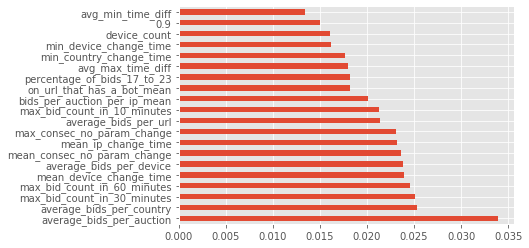

In [0]:
print('Feature importance of Random Forest Model')

feat_importances = pd.Series(RF_bestClf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
fig.savefig('rf_feature.png')





Feature importance of Gradient Boost Model


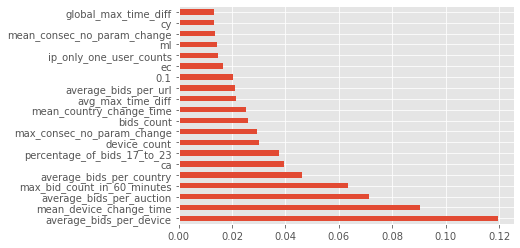

In [0]:
print('Feature importance of Gradient Boost Model')
feat_importances = pd.Series(GB_bestClf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
fig.savefig('GB_feature.png')


Feature importance of XGBoost Model


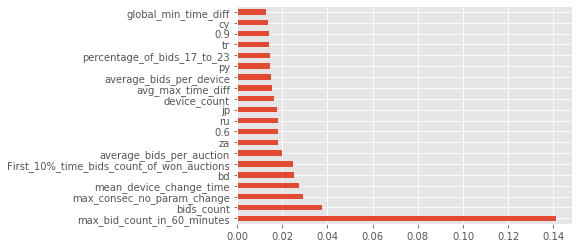

In [0]:

print('Feature importance of XGBoost Model')
feat_importances = pd.Series(XGB_bestClf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
fig.savefig('XGB_feature.png')


In [0]:
RF_seleceted_features = SelectFromModel(RF_bestClf, threshold='12*median')
RF_seleceted_features.fit(X_train_CV,y_train_CV)

GB_seleceted_features = SelectFromModel(GB_bestClf, threshold=0.0147)
GB_seleceted_features.fit(X_train_CV,y_train_CV)


XGB_seleceted_features = SelectFromModel(XGB_bestClf, threshold=0.013)
XGB_seleceted_features.fit(X_train_CV,y_train_CV)


SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        colsample_bylevel=1, colsample_bynode=1,
                                        colsample_bytree=1, gamma=0,
                                        learning_rate=0.2, max_delta_step=0,
                                        max_depth=48, min_child_weight=1,
                                        missing=None, n_estimators=300,
                                        n_jobs=1, nthread=None,
                                        objective='binary:logistic',
                                        random_state=0, reg_alpha=0.8,
                                        reg_lambda=0.4, scale_pos_weight=1,
                                        seed=None, silent=None, subsample=1,
                                        verbosity=1),
                max_features=None, norm_order=1, prefit=False, threshold=0.013)

In [0]:

embeded_rf_support = RF_seleceted_features.get_support()
embeded_rf_feature = X_train_CV.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'RF selected features')

embeded_GB_support = GB_seleceted_features.get_support()
embeded_GB_feature = X_train_CV.loc[:,embeded_GB_support].columns.tolist()
print(str(len(embeded_GB_feature)), 'GB selected features')

embeded_XGB_support = XGB_seleceted_features.get_support()
embeded_XGB_feature = X_train_CV.loc[:,embeded_XGB_support].columns.tolist()
print(str(len(embeded_XGB_feature)), 'XGB selected features')




19 RF selected features
18 GB selected features
19 XGB selected features


In [0]:
print("RF Features")
print(embeded_rf_feature)
print("GB Features")
print(embeded_GB_feature)
print("XGB Features")
print(embeded_XGB_feature)

RF Features
['device_count', 'average_bids_per_auction', 'average_bids_per_device', 'average_bids_per_url', 'average_bids_per_country', 'bids_per_auction_per_ip_mean', 'on_url_that_has_a_bot_mean', 'avg_min_time_diff', 'avg_max_time_diff', '1.0', 'max_bid_count_in_10_minutes', 'max_bid_count_in_30_minutes', 'max_bid_count_in_60_minutes', 'mean_consec_no_param_change', 'mean_device_change_time', 'mean_ip_change_time', 'min_country_change_time', 'min_device_change_time', 'percentage_of_bids_17_to_23']
GB Features
['device_count', 'ip_count', 'average_bids_per_auction', 'average_bids_per_device', 'average_bids_per_country', 'by', 'ca', 'ec', 'jp', 'last_10%_auction_time_bids', 'global_min_time_diff', '0.9', 'max_bid_count_in_10_minutes', 'max_bid_count_in_30_minutes', 'max_bid_count_in_60_minutes', 'mean_device_change_time', 'min_device_change_time', 'percentage_of_bids_17_to_23']
XGB Features
['device_count', 'average_bids_per_auction', 'on_url_that_has_a_bot_mean', 'countries_per_bidder

In [0]:
RF_X_important_train_CV = RF_seleceted_features.transform(X_train_CV)
RF_X_important_test_CV = RF_seleceted_features.transform(X_test_CV)

GB_X_important_train_CV = GB_seleceted_features.transform(X_train_CV)
GB_X_important_test_CV = GB_seleceted_features.transform(X_test_CV)

XGB_X_important_train_CV = XGB_seleceted_features.transform(X_train_CV)
XGB_X_important_test_CV = XGB_seleceted_features.transform(X_test_CV)

In [0]:
## Training RF
RF_model_important=RandomForestClassifier(random_state=42)
RF_param_grid = { 
    'n_estimators': [100,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7]      
}
RF_classifier_important = GridSearchCV(estimator=RF_model_important, param_grid=RF_param_grid, cv= 5,verbose=3)
RF_classifier_important.fit(RF_X_important_train_CV, y_train_CV)
RF_bestClf_important=RF_classifier_important.best_estimator_


## Training GB
GB_Model_important = GradientBoostingClassifier(random_state=42)
GB_param_grid = {
    'n_estimators': [10,25,50],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 11)
}
GB_classifier_important = GridSearchCV(estimator=GB_Model_important,
                     param_grid=GB_param_grid,
                     cv=5, verbose=3)
GB_classifier_important.fit(GB_X_important_train_CV, y_train_CV)
GB_bestClf_important=GB_classifier_important.best_estimator_

## Training XGB
XGB_Model_important = xgboost.XGBClassifier()
XGB_param_grid = {
                  'max_depth': np.arange(2,50,2),
                  'learning_rate': np.arange(0.2,2,0.2),
                  'n_estimators': np.arange(20,400,20),
                  'reg_alpha': np.arange(0,2,0.2),
                  'reg_lambda': np.arange(0,2,0.2)
                 }

CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)
XGB_classifier_important = RandomizedSearchCV(XGB_Model_important, XGB_param_grid, scoring = 'roc_auc', cv = CV_SSS,
                                        n_iter = 40,verbose=3)
XGB_classifier_important.fit(XGB_X_important_train_CV,y_train_CV)
XGB_bestClf_important=XGB_classifier_important.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.964, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.957, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.960, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................
[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.954, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................
[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.960, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.964, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.957, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.960, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.950, total= 

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.2min finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.957, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.950, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.950, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.964, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.960, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.974, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.957, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.960, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=50 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=50, score=0.960, total=   0.2s
[CV] ma

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   16.7s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] reg_lambda=0.4, reg_alpha=1.4000000000000001, n_estimators=20, max_depth=28, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.4, reg_alpha=1.4000000000000001, n_estimators=20, max_depth=28, learning_rate=1.4000000000000001, score=0.915, total=   0.0s
[CV] reg_lambda=0.4, reg_alpha=1.4000000000000001, n_estimators=20, max_depth=28, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.4, reg_alpha=1.4000000000000001, n_estimators=20, max_depth=28, learning_rate=1.4000000000000001, score=0.930, total=   0.0s
[CV] reg_lambda=0.4, reg_alpha=1.4000000000000001, n_estimators=20, max_depth=28, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.4, reg_alpha=1.4000000000000001, n_estimators=20, max_depth=28, learning_rate=1.4000000000000001, score=0.918, total=   0.0s
[CV] reg_lambda=0.4, reg_alpha=1.4000000000000001, n_estimators=20, max_depth=28, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.4, reg_alpha=1.40000000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rate=0.6000000000000001, score=0.922, total=   0.1s
[CV] reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rate=0.6000000000000001 
[CV]  reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rate=0.6000000000000001, score=0.939, total=   0.1s
[CV] reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rate=0.6000000000000001 
[CV]  reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rate=0.6000000000000001, score=0.910, total=   0.1s
[CV] reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rate=0.6000000000000001 
[CV]  reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rate=0.6000000000000001, score=0.917, total=   0.1s
[CV] reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rate=0.6000000000000001 
[CV]  reg_lambda=0.8, reg_alpha=1.6, n_estimators=220, max_depth=4, learning_rat

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.4s finished


## Classification Reports

In [0]:
expected_test = y_test_CV

RF_predicted_test_important = RF_bestClf_important.predict(RF_X_important_test_CV)
GB_predicted_test_important = GB_bestClf_important.predict(GB_X_important_test_CV)
XGB_predicted_test_important = XGB_bestClf_important.predict(XGB_X_important_test_CV)

print("RANDOM FOREST CLASSIFICATION REPORT")
print(classification_report(expected_test, RF_predicted_test_important))
print("-----------------------------")

print("GRADIENT BOOST CLASSIFICATION REPORT")
print(classification_report(expected_test, GB_predicted_test_important))
print("-----------------------------")

print("GRADIENT BOOST CLASSIFICATION REPORT")
print(classification_report(expected_test, XGB_predicted_test_important))
print("-----------------------------")

RANDOM FOREST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       483
         1.0       0.71      0.24      0.36        21

    accuracy                           0.96       504
   macro avg       0.84      0.62      0.67       504
weighted avg       0.96      0.96      0.96       504

-----------------------------
GRADIENT BOOST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       483
         1.0       0.62      0.24      0.34        21

    accuracy                           0.96       504
   macro avg       0.80      0.62      0.66       504
weighted avg       0.95      0.96      0.95       504

-----------------------------
GRADIENT BOOST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       483
         1.0       0.50      0.24      0.32        21

    accuracy

## Average Precision

In [0]:
RF_predicted_probs_test_important= RF_bestClf_important.predict_proba(RF_X_important_test_CV)
GB_predicted_probs_test_important = GB_bestClf_important.predict_proba(GB_X_important_test_CV)
XGB_predicted_probs_test_important = XGB_bestClf_important.predict_proba(XGB_X_important_test_CV)


print("AVERAGE PRECISION RANDOM FOREST")
print(average_precision_score(y_test_CV.astype('int'),RF_predicted_probs_test_important[:,1]))


print("AVERAGE PRECISION GRADIENT BOOST")
print(average_precision_score(y_test_CV.astype('int'),GB_predicted_probs_test_important[:,1]))


print("AVERAGE PRECISION XGBOOST")
print(average_precision_score(y_test_CV.astype('int'),XGB_predicted_probs_test_important[:,1]))

AVERAGE PRECISION RANDOM FOREST
0.5219059896803723
AVERAGE PRECISION GRADIENT BOOST
0.4915461542368314
AVERAGE PRECISION XGBOOST
0.4199123074091863


RF Graph


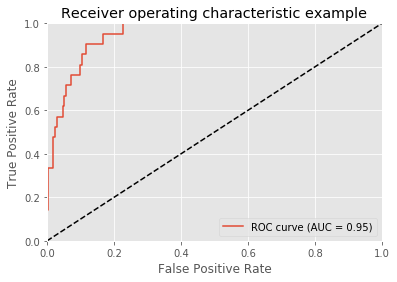

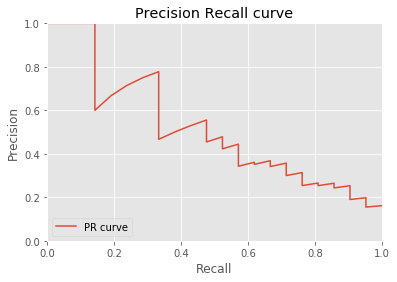

GB Graph


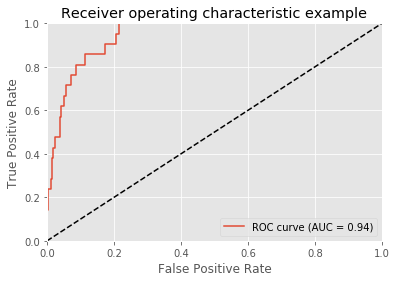

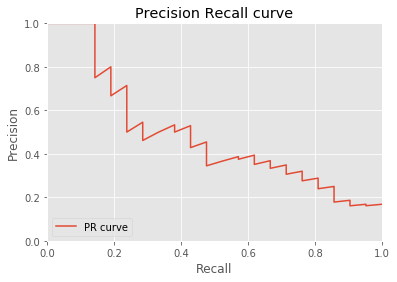

XGB Graph


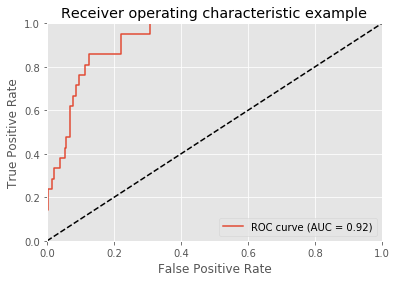

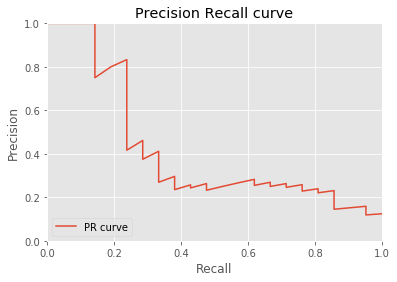

In [0]:
print("RF Graph")
plotMetrics(y_test_CV.astype('int'),RF_predicted_probs_test_important[:,1])

print("GB Graph")
plotMetrics(y_test_CV.astype('int'),GB_predicted_probs_test_important[:,1])


print("XGB Graph")
plotMetrics(y_test_CV.astype('int'),XGB_predicted_probs_test_important[:,1])

## Cross Validation

In [0]:
scoring = ['average_precision', 'roc_auc']
RF_scores = cross_validate(RF_bestClf_important, RF_X_important_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
GB_scores = cross_validate(GB_bestClf_important, GB_X_important_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
XGB_score = cross_validate(XGB_bestClf_important,XGB_X_important_test_CV, y_test_CV, scoring=scoring,return_train_score=True)

In [0]:

print("RANDOM FOREST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", RF_scores['test_average_precision'].mean())
print("ROC_AUC", RF_scores['test_roc_auc'].mean())
print("-------------------------------")

print("GRADIENT BOOST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", GB_scores['test_average_precision'].mean())
print("ROC_AUC", GB_scores['test_roc_auc'].mean())
print("-------------------------------")

print("XGBOOST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", XGB_score['test_average_precision'].mean())
print("ROC_AUC", XGB_score['test_roc_auc'].mean())
print("-------------------------------")

RANDOM FOREST CROSS VALIDATION
-------------------------------
average_precision 0.4742068454850963
ROC_AUC 0.9170672250859105
-------------------------------
GRADIENT BOOST CROSS VALIDATION
-------------------------------
average_precision 0.40910780864489305
ROC_AUC 0.8973850945017181
-------------------------------
XGBOOST CROSS VALIDATION
-------------------------------
average_precision 0.417330591368704
ROC_AUC 0.903827319587629
-------------------------------


## Submissions

In [0]:
RF_seleceted_features = SelectFromModel(RF_bestClf, threshold='12*median')
RF_seleceted_features.fit(X_train,y_train)
GB_seleceted_features = SelectFromModel(GB_bestClf, threshold=0.0147)
GB_seleceted_features.fit(X_train,y_train)
XGB_seleceted_features = SelectFromModel(XGB_bestClf, threshold=0.013)
XGB_seleceted_features.fit(X_train,y_train)


RF_X_important_train = RF_seleceted_features.transform(X_train)
RF_X_important_test = RF_seleceted_features.transform(X_test)
GB_X_important_train = GB_seleceted_features.transform(X_train)
GB_X_important_test = GB_seleceted_features.transform(X_test)
XGB_X_important_train = XGB_seleceted_features.transform(X_train)
XGB_X_important_test = XGB_seleceted_features.transform(X_test)

In [0]:
## Training RF
RF_model_important=RandomForestClassifier(random_state=42)
RF_param_grid = { 
    'n_estimators': [100,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7]      
}
RF_classifier_important = GridSearchCV(estimator=RF_model_important, param_grid=RF_param_grid, cv= 5,verbose=3)
RF_classifier_important.fit(RF_X_important_train, y_train)
RF_bestClf_important=RF_classifier_important.best_estimator_


## Training GB
GB_Model_important = GradientBoostingClassifier(random_state=42)
GB_param_grid = {
    'n_estimators': [10,25,50],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 11)
}
GB_classifier_important = GridSearchCV(estimator=GB_Model_important,
                     param_grid=GB_param_grid,
                     cv=5, verbose=3)
GB_classifier_important.fit(GB_X_important_train, y_train)
GB_bestClf_important=GB_classifier_important.best_estimator_

## Training XGB
XGB_Model_important = xgboost.XGBClassifier()
XGB_param_grid = {
                  'max_depth': np.arange(2,50,2),
                  'learning_rate': np.arange(0.2,2,0.2),
                  'n_estimators': np.arange(20,400,20),
                  'reg_alpha': np.arange(0,2,0.2),
                  'reg_lambda': np.arange(0,2,0.2)
                 }

CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)
XGB_classifier_important = RandomizedSearchCV(XGB_Model_important, XGB_param_grid, scoring = 'roc_auc', cv = CV_SSS,
                                        n_iter = 40,verbose=3)
XGB_classifier_important.fit(XGB_X_important_train,y_train)
XGB_bestClf_important=XGB_classifier_important.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.950, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.960, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.955, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................
[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.960, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................
[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.970, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.943, total=   0.8s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.960, total=   0.8s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.953, total=   0.8s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.960, total= 

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.5min finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.945, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.960, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.955, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.960, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.965, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.953, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.963, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.953, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.968, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.973, total=   0.1s
[CV] ma

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   21.3s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001, score=0.928, total=   0.1s
[CV] reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001, score=0.921, total=   0.1s
[CV] reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001, score=0.916, total=   0.1s
[CV] reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001, score=0.924, total=   0.1s
[CV] reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.0, reg_alpha=1.2000000000000002, n_estimators=80, max_depth=40, learning_rate=1.4000000000000001, score=0.927, total=   0.1s
[CV] reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=140, max_depth=40, learning_rate=1.2 
[CV]  reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=140, max_depth=40, learning_rate=1.2, score=0.926, total=   0.1s
[CV] reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=140, max_depth=40, learning_rate=1.2 
[C

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.1s finished


In [0]:
## Predict Test Results
RF_test_pred_important= RF_bestClf_important.predict_proba(RF_X_important_test)
GB_test_pred_important= GB_bestClf_important.predict_proba(GB_X_important_test)
XGB_test_pred_important= XGB_bestClf_important.predict_proba(XGB_X_important_test)

## Create Series
RF_test_pred_series_important = pd.Series(RF_test_pred_important[:,1])
GB_test_pred_series_important = pd.Series(GB_test_pred_important[:,1])
XGB_test_pred_series_important = pd.Series(XGB_test_pred_important[:,1])

## Add Prediction Columns
test['RF_prediction_important']=RF_test_pred_series_important
test['GB_prediction_important']=GB_test_pred_series_important
test['XGB_prediction_important']=XGB_test_pred_series_important



In [0]:
RF_submission=test[['bidder_id','RF_prediction_important']]
RF_submission= RF_submission.set_index('bidder_id')

GB_submission =test[['bidder_id','GB_prediction_important']]
GB_submission= GB_submission.set_index('bidder_id')

XGB_submission = test[['bidder_id','XGB_prediction_important']]
XGB_submission=XGB_submission.set_index('bidder_id')

In [0]:
RF_submission.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/report_models_important_RF.csv')
GB_submission.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/report_models_important_GB.csv')
XGB_submission.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/report_models_important_XGB.csv')

# End